In [29]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt    
import seaborn as sns

In [30]:
data=pd.read_csv("/content/COVIDSenti-A.csv")

In [31]:
data


,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


In [32]:
data.shape

(30000, 2)

In [33]:
#checking for null values
data.isnull().sum()

tweet    0
label    0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


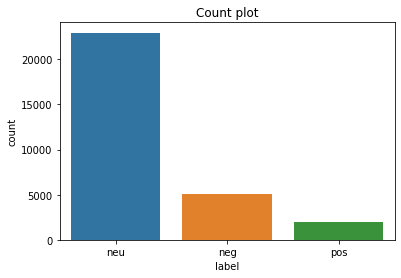

In [34]:
#Visualizing data
plt.title('Count plot')
sns.countplot(data['label'])

In [35]:
!pip install unidecode
import nltk
nltk.download('stopwords')
nltk.download('punkt')
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [13]:
def preprocess_word(word):
    # Remove punctuation
    word = word.strip('\'"?!,.():;')
    # Convert more than 2 letter repetitions to 2 letter
    # funnnnny --> funny
    word = re.sub(r'(.)\1+', r'\1\1', word)
    # Remove - & '
    word = re.sub(r'(-|\')', '', word)
    return word



In [14]:
def preprocess_tweet(tweet):
    processed_tweet = []
    tweet = tweet.lower()
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' ', tweet)
    tweet = re.sub(r'@[\S]+','', tweet)
    tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
    tweet = re.sub(r'\brt\b', '', tweet)
    tweet = re.sub(r'\.{2,}', ' ', tweet)
    tweet = tweet.strip(' "\'')
    tweet = re.sub(r'\s+', ' ', tweet)
    words = tweet.split()
    ps = PorterStemmer()

    for word in words:
        word = preprocess_word(word)
        #word = str(ps.stem(word))
        processed_tweet.append(word)
    filtered_words = [w for w in processed_tweet if not w in stop_words]
            
    return ' '.join(filtered_words)


     

In [16]:
data['clean_tweet'] = data['tweet'].apply(lambda x:preprocess_tweet(x))


In [18]:
data.head()

,tweet,label,clean_tweet
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu,coronavirus | human coronavirus types | cdc
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu,that‚äôs üíø true corona virus swine flue bi...
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg,tldr sars possibly new coronavirus difficult c...
3,Disease outbreak news from the WHO: Middle Eas...,neu,disease outbreak news middle east respiratory ...
4,China - Media: WSJ says sources tell them myst...,neu,china media wsj says sources tell mystery pne...


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [20]:
X = data['clean_tweet']

In [21]:
y = data['label']


In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=68)


In [23]:
print(x_train.shape,x_test.shape)

(24000,) (6000,)


In [24]:
tfv=TfidfVectorizer()
train_vec = tfv.fit_transform(x_train)
test_vec = tfv.transform(x_test)


In [25]:
model=SVC(kernel='linear')
model.fit(train_vec,y_train)
pred=model.predict(test_vec)

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))


0.8956666666666667


In [27]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


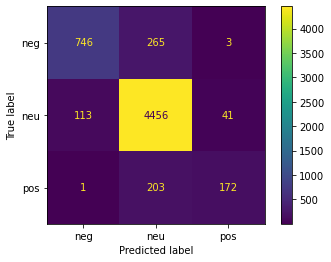

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test,pred)
